In [ ]:
# Things to install before running this notebook on the EVK
# python3 -m pip install Cython
# python3 -m pip install https://github.com/endangeredoxen/fivecentplots/zipball/master
# python3 -m pip install openpyxl
# python3 -m pip install xlrd==1.2.0
# python3 -m pip install matplotlib==2.1.1

# Still an import bug in characterization folder. 
# Each file containing "source" should be replaced with "characterization".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.getcwd()))
from ams_jetcis.scripts import sensor_script_example as scripts


Bad key "text.kerning_factor" on line 4 in
/home/jetcis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import inspect
import pandas as pd
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
parentdir2 = os.path.dirname(parentdir)
parentdir3 = os.path.dirname(parentdir2)
sys.path.insert(0, parentdir2)
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import fivecentplots as fcp
from ams_jetcis.characterization.stats_engine import stats
from ams_jetcis.characterization.emva import emva
from ams_jetcis.characterization.standard_tests import ptc
import pdb
import warnings
warnings.filterwarnings("ignore")

In [3]:
sensor = scripts.select_sensor('Mira220', 0)
sensor.cold_start()
sensor.init_sensor()

exps = [1e2, 1e3, 1e4, 2e4]
list_imgs = []

for exp in exps:
    print(exp)
    sensor.exposure_us = exp

    imgs = sensor.imager.grab_images(10)
    list_imgs.append(imgs)

df = pd.DataFrame({'Exposure [uW/cm^2*s]': exps})
data, hist, summ = ptc.ptc(list_imgs, df, exp_col='Exposure [uW/cm^2*s]')

Open card:
Current sensor loaded: mira220
Current jetpack loaded: 4.6
Current kernel loaded: Linux-4.9.253-tegra-aarch64-with-Ubuntu-18.04-bionic
Correct sensor driver loaded
Reset sensor low
Reset sensor high 
Mira220 detected with ID 01:0C:2D:05:0B:04:E5:07
100.0
1000.0
10000.0
20000.0


In [4]:
df

,Exposure [uW/cm^2*s]
0,100.0
1,1000.0
2,10000.0
3,20000.0


In [5]:
data

,Tot Var [DN^2],Col Var [DN^2],Row Var [DN^2],Pix Var [DN^2],Tot Temp Var [DN^2],Col Temp Var [DN^2],Row Temp Var [DN^2],Pix Temp Var [DN^2],Mean Signal [DN],Tot Var - Tot Dark Var [DN^2],...,Linearity Fit [DN],Linearity Error [%],Linearity Error [DN],Responsivity Fit [DN],SNR [dB],SNR [ratio],SNR Ideal [dB],SNR Ideal [ratio],SNR Theoretical [dB],SNR Theoretical[ratio]
0,5.241596,0.190544,0.440795,4.613142,6.387069,0.250195,0.639372,5.500943,210.307453,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.624053,1.995071,1.245223,16.394013,11.460132,2.086179,1.488930,7.889959,220.225466,14.382457,...,9.918012,3.582082e-14,3.552714e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1341.695591,186.377546,346.126793,809.697674,50.341944,187.386479,347.258647,-484.606277,325.263755,1336.453995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4816.363817,640.096491,1431.826425,2746.158476,82.059373,643.648938,1435.257444,-1998.096712,439.929484,4811.122221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(data.columns)

Index(['Tot Var [DN^2]', 'Col Var [DN^2]', 'Row Var [DN^2]', 'Pix Var [DN^2]',
       'Tot Temp Var [DN^2]', 'Col Temp Var [DN^2]', 'Row Temp Var [DN^2]',
       'Pix Temp Var [DN^2]', 'Mean Signal [DN]',
       'Tot Var - Tot Dark Var [DN^2]', 'Col Var - Col Dark Var [DN^2]',
       'Row Var - Row Dark Var [DN^2]', 'Pix Var - Pix Dark Var [DN^2]',
       'Tot Temp Var - Tot Dark Temp Var [DN^2]',
       'Col Temp Var - Col Dark Temp Var [DN^2]',
       'Row Temp Var - Row Dark Temp Var [DN^2]',
       'Pix Temp Var - Pix Dark Temp Var [DN^2]', 'Signal - Dark [DN]',
       'CFPN Ratio', 'CTN Ratio', 'RFPN Ratio', 'RTN Ratio', 'Pix FPN [%]',
       'Tot FPN [%]', 'Col FPN [%]', 'Row FPN [%]', 'Exposure [uW/cm^2*s]',
       'System Gain Fit [DN^2]', 'Tot Var [e^2]', 'Col Var [e^2]',
       'Row Var [e^2]', 'Pix Var [e^2]', 'Tot Temp Var [e^2]',
       'Col Temp Var [e^2]', 'Row Temp Var [e^2]', 'Pix Temp Var [e^2]',
       'Mean Signal [e]', 'Tot Var - Tot Dark Var [e^2]',
       'Col Va

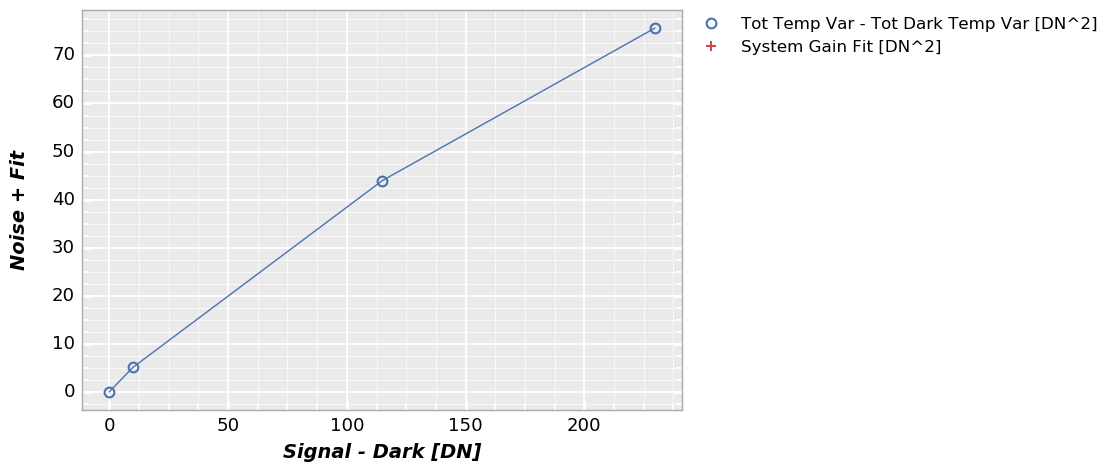

In [7]:
fcp.plot(df=data, x='Signal - Dark [DN]', y=['Tot Temp Var - Tot Dark Temp Var [DN^2]','System Gain Fit [DN^2]'],
         ax_size=[600,400], grid_minor=True, label_y='Noise + Fit')